In [1]:
from src.aco_mapf.GraphWorld import GraphWorld, TestProblem
from src.aco_mapf.AcoAgent import AcoAgent, Colony
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from ExperimentRunner.ExperimentRunner import Experiment, Parameter
import ipyparallel as ipp

In [2]:
test1 = TestProblem().hard_2()

In [3]:
test1

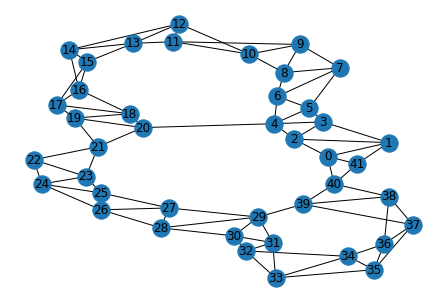

In [4]:
test1.draw_adjacency()

In [5]:
test1.agents[0].goal

27

In [6]:
start, state, goal = test1.agents[0].start, test1.agents[0].state, test1.agents[0].goal
test1.agents = [AcoAgent(start=start, state=state, goal=goal)]

In [7]:
test1.step

<bound method GraphWorld.step of <src.aco_mapf.GraphWorld.GraphWorld object at 0x11c1dccc0>>

In [8]:

@ipp.require("pandas as pd", "numpy as np", GraphWorld, TestProblem, AcoAgent, Colony)
def run_testprolem_aco(seed=0, steps=10):
    c = Colony()
    agents = [AcoAgent(seed=seed+offset, colony=c) for offset in range(1)]
    problem = TestProblem(seed=seed).hard_2(agents=agents)
    for _ in range(steps):
        problem.step()
    df = problem.get_data() 
    return df


In [9]:
parameters = [Parameter(name="steps", default=100, space=[100 * i for i in range(1,15)])]
experiment = Experiment(seed=1, function=run_testprolem_aco, parameters=parameters, runs=10)

/Users/sebastian/Software/MAPF/lib/python3.7/site-packages/ipyparallel/util.py:214: RuntimeWarning: IPython could not determine IPs for Sebastians-MacBook-Pro.local: [Errno 8] nodename nor servname provided, or not known
  RuntimeWarning)


In [10]:
experiment.generate_tasks()

In [11]:
df = experiment.run_map()

 140/140 tasks finished after    7 s
done


In [12]:
experiment.rc.history

['74793381-7abddb0371e6f4e92923298a',
 '7c9add00-1b9c8cceafebe097c32d9401',
 '35cee5b4-4d7a563be1a80518308ae3c4',
 '8c97f70c-68c5fd071c6f1aa53061e489',
 'e66f38a3-6c682ba5bdc12f84eab9c6db',
 'a327af3c-2810387795dcabc5fee4ae1c',
 '88db84ef-d251b5252be2338c00eb1774',
 '98a26ce1-1ab62cca39e5273549367afc',
 'd1503e98-11d80a35c0b2305d96b117ba',
 '12bcce82-d27497bce318c4fd392cd1c2',
 'ae944273-7ccb5b56fe1eee412340c6af',
 '35ae3b0c-d5696c21cc558e1a19ae9371',
 'd6db1e01-3cd4ca6d5ea4fc63600be6fd',
 '11bc2140-a9b0bd8cf3d01f368419ba0f',
 '0a941fb5-4a1d1d7ef246878f5c56e84c',
 '695d9333-0a94a3fe30b7ae5ddbbe3ff1',
 'b7cf03a5-3634cdbe42ed83b670ae905b',
 '355eb9c5-edc5e68f5fd0ccac2f44faf5',
 '3afc062b-3a754696a6feda9bc38340d6',
 '88fcc9ed-eda109348bd51fd3e256a9f1',
 '582d57e5-435af548b519f1878976fafb',
 'f415b94f-d55b865f942bf2293ac79350',
 '29d4bad1-330e834d62c15947595d5f32',
 '14bbbd39-21bc7eb4bca8de50e61fb8ff',
 '87541b28-e5374d650da93dd652341081',
 'e350cf18-ba62b85dd1e97167bc3f6b0f',
 '06677bd4-4

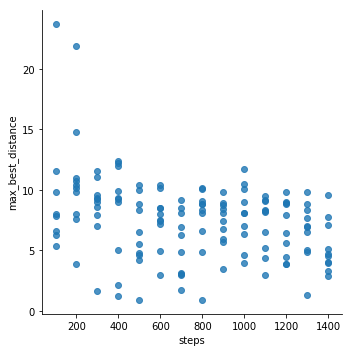

In [13]:
sns.lmplot(data=experiment.results, x="steps", y="max_best_distance", order=2)

In [14]:
sns.lmplot()

TypeError: lmplot() missing 3 required positional arguments: 'x', 'y', and 'data'